# Building "Hydrosense" through Analytical Models

Very soon, we will begin using computational tools to solve groundwater flow problems and analyze the results of their predictions. With complex groundwater flow models, there are many ways that one can get the wrong answer (some have argued, indeed, that ["all models are wrong"](https://en.wikipedia.org/wiki/All_models_are_wrong). As a modeler, its your job to avoid the most eggregious ways of being wrong, and to be clear about how uncertainties or assumptions may contribute to errors in your model.

Examples of things that can make a model wrong include (in rough order from most eggregious to least):
* **User Error**: A parameter of the model (such as a recharge rate, or hydraulic conductivity) is incorrectly specified, impacting model results.
* **Numerical Error**: The solution to the numerical version of your model is impacted by solver issues such as convergence
* **Discretization Error**: The solution to the numerical version of your problem is impacted by the size of spatial or temporal discretizations used
* **Conceptual Error in Physical Approximations**: The results of the model do not represent the physical processes that are important in the real-world system
* **Conceptual Error in Geometry Specifications**: The results of the model are impacted by incorrect specifications of internal or external boundaries. For example, you assume that a low-permeability clay layer is continuous when it is not.

Analytical models, that is, those that result from a direct calculus-style solution, are generally only possible to derive for simplified geometries (e.g., the "spherical cow", the circular island). However, because their results are exact, they provide useful test-cases for comparing against numerical models. Similarly, the results of an analytical solution often provide clues about the relative importance of different processes. 

We will build and observe several analytical solutions in this notebook to gain insights from various analytical solutions. Below we provide template code for plotting analytical solutions.

## Learning Objectives

By using this notebook, you should be able to:
* Plot and visualize analytical solutions to the groundwater flow equation in 1-D and 2-D
* Compare different solutions to understand key differences

# Initial Setup

In [1]:
#When working with files, it is always a good idea to import os, which allows you to be computer-agnostic
import os

#To create basic animations (by repeatedly changing a figure), these internal subroutines of iPython must be imported
from IPython.display import clear_output, display

#Any type of plot that involves matrices will end up needing NumPy
import numpy as np
#Import the plotting libraries of Matplotlib (the most commonly used routines)
import matplotlib.pyplot as plt

# Plotting template

The code below provides a template that can be used to plot the analytical solutions we'll work with in class consistently. You may copy and paste this section of code as we develop and test new solutions. Please use the sections below as a template to document your results.

## Model Setup

This plots the solution to groundwater flow assuming XX, YY, and ZZ. Plots are included as a cross-section through the aquifer, and as an equipotential map.

I've included an image documenting what we're solving here:

![python_cmdline](./doc_materials/model_geometry.png 'Model Geometry')

## Results / Lessons learned

The following useful lessons come from this model:
* Equipotentials should be on constant head boundaries
* YYY
* ZZZ

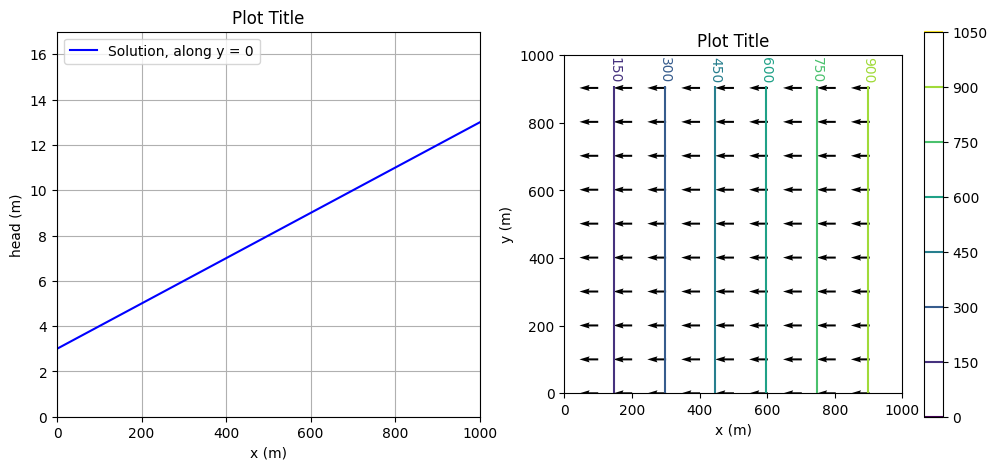

In [2]:
#This location is a good place to list your assumptions for the models you are investigating:
#For example:
#Steady-state / Transient
#1-D (x-direction flow) / Radial flow / 2-D flow
#Homogeneous / Heterogeneous or Isotropic / Anisotropic
#Confined or Unconfined
#etc.

#We will often want to observe how a solution changes according to different parameters, so defining
#the parameters once makes updating your solutions easy
#Physical parameters
Lx = 1000
Ly = 1000
h1 = 10
C = 1.5
h2 = C*h1
K = 10
#Discretization parameters
numx = 300
numy = 300
slice_step = 30

x = np.linspace(0,Lx,numx)
y = np.linspace(0,Ly,numy)
xm,ym = np.meshgrid(x,y)

#1-D solution, plug in values for other spatial variables
h1D_soln = x/100 + 3
h1Dmax_soln = np.max(h1D_soln)
#2-D solution
h2D_soln = xm + 3 
h2Dmax_soln = np.max(h2D_soln)
#Discharge for 2-D solution
qx2D_soln = -np.ones(np.shape(xm))
qy2D_soln = 0*np.ones(np.shape(xm))

sl = slice(None,None,slice_step)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#Produce two visualizations: 
#0: Cross-section with water table (1-D), and 
axes[0].plot(x, h1D_soln, "b",label="Solution, along y = 0")
#If more solutions should be plotted, use this format
#axes[0].plot(x, h1D_soln2, "b",label="Water Table Unconfined",alpha=0.3)
axes[0].set_xlabel("x (m)")
axes[0].set_ylabel("head (m)")
axes[0].set_title("Plot Title")
axes[0].legend(loc='upper left')
axes[0].set_ybound(0,h1Dmax_soln+4)
axes[0].set_xbound(0,Lx)
axes[0].grid(visible=True)

#1: Equipotential map (2-D) 
cn_soln = axes[1].contour(xm, ym, h2D_soln)
#If more solutions should be plotted, use this format
#cn_soln2 = axes[1].contour(xm, ym, h2D_soln2,alpha=0.3)
axes[1].clabel(cn_soln)
axes[1].quiver(xm[sl,sl],ym[sl,sl],qx2D_soln[sl,sl],qy2D_soln[sl,sl])
axes[1].set_xlabel("x (m)")
axes[1].set_ylabel("y (m)")
axes[1].set_title("Plot Title")
axes[1].set_ybound(0,Ly)
axes[1].set_xbound(0,Lx)
axes[1].set_aspect("equal")

cb = fig.colorbar(cn_soln, ax=axes[1])
